Exploration

In [18]:
data <- read.csv(file.path("..", "data", "training_data.csv"))

In [6]:
#predictors, type of data
data

Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,...,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
low,45,FALSE,302.0,208.33,5.952,19.698,34.491,21.523,39.571,...,0,0,1,0,1,0,1,0,1,0
high,49,TRUE,72.6,122.18,6.431,11.349,18.745,12.261,21.285,...,0,0,0,0,0,0,0,0,0,0
high,56,TRUE,259.0,242.29,7.572,20.832,32.167,21.693,35.535,...,0,0,1,0,1,1,1,0,1,1
high,7,FALSE,56.6,88.12,6.294,7.537,14.189,7.955,16.080,...,0,0,0,0,0,0,0,0,0,0
low,51,FALSE,84.7,136.21,6.191,12.876,21.629,14.023,24.701,...,0,0,0,0,0,0,0,0,0,0
high,21,FALSE,160.0,192.28,6.409,17.644,29.723,19.000,33.740,...,0,0,0,0,1,0,1,0,1,0
low,56,FALSE,116.0,170.22,7.401,15.349,22.745,16.261,25.285,...,0,0,0,0,1,0,0,0,1,0
low,52,FALSE,25.0,114.26,4.395,12.741,24.952,14.853,29.737,...,0,0,0,0,0,0,0,0,0,0
low,53,TRUE,355.0,268.30,7.666,21.304,36.025,21.614,39.950,...,0,0,1,0,1,1,1,1,1,1
low,1,FALSE,68.4,152.26,9.516,9.911,16.342,11.250,17.920,...,0,0,0,0,0,0,0,0,0,0


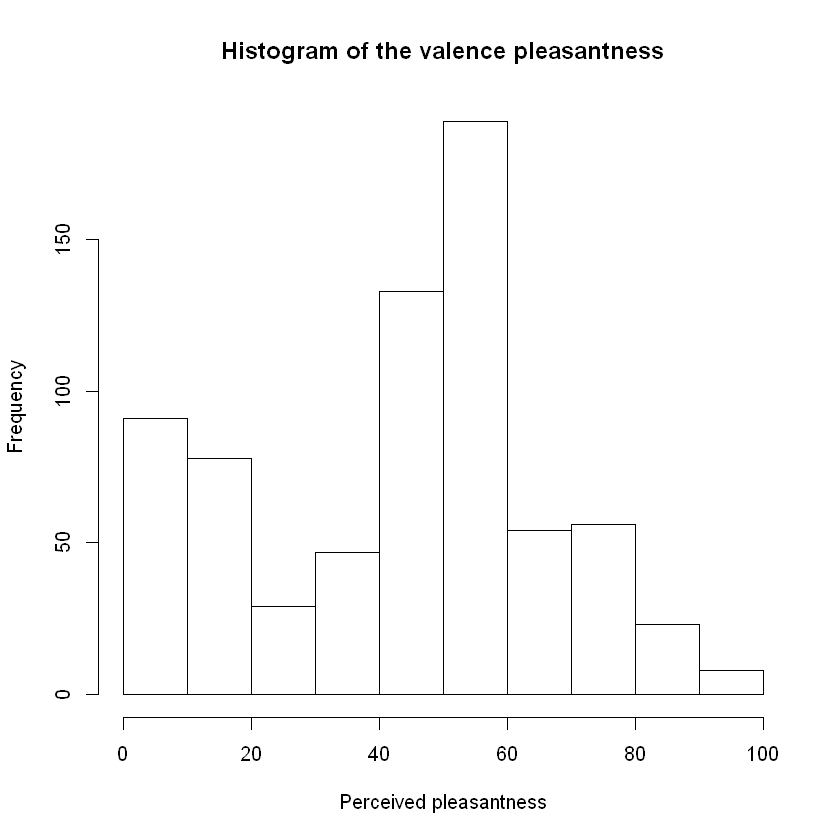

In [15]:
#observe the general distribution of pleasantness
hist(data$VALENCE.PLEASANTNESS, xlab="Perceived pleasantness",main="Histogram of the valence pleasantness")

#--> approximately normal with stronger left tail

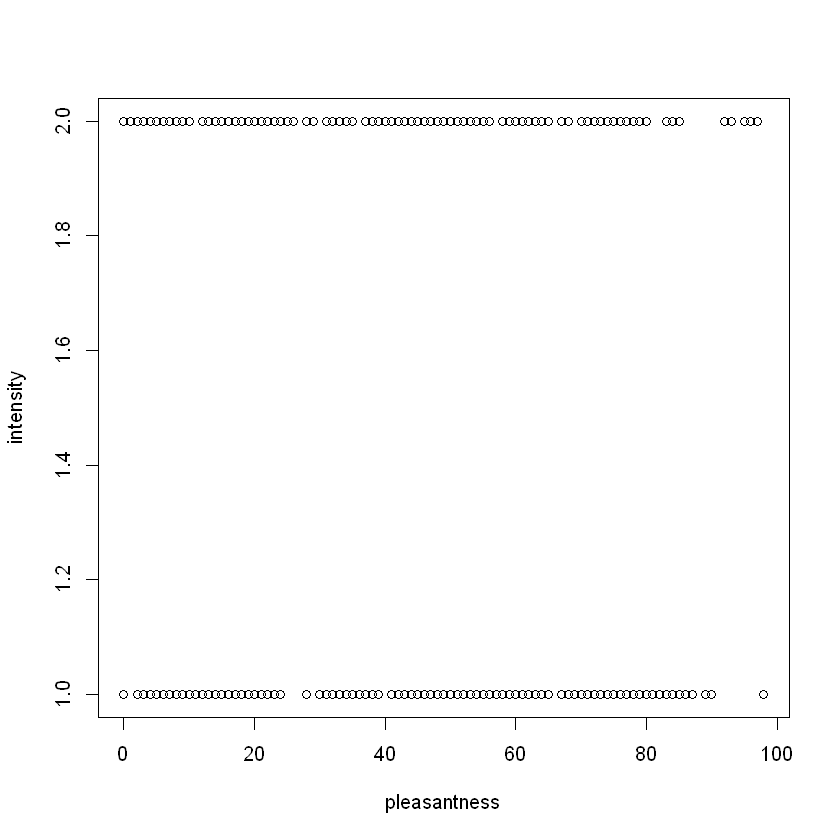

In [61]:
#verify if there is a  possible clear link between intensity and pleasantness
plot(data$VALENCE.PLEASANTNESS,as.factor(data$Intensity),xlab="pleasantness", ylab="intensity")

##--> no clear link

In [70]:
#try the general linear fit for MSE baseline
fit<-lm(VALENCE.PLEASANTNESS~., data)

In [64]:
summary(fit)


Call:
lm(formula = VALENCE.PLEASANTNESS ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.436  -8.186   0.324   8.018  37.814 

Coefficients: (4536 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -2.951e+07  5.396e+07  -0.547   0.5848    
Intensitylow            3.371e+00  1.199e+00   2.811   0.0052 ** 
SWEETORSOURTRUE         2.470e+01  1.897e+00  13.023   <2e-16 ***
complexity.from.pubmed -7.472e+02  1.086e+03  -0.688   0.4920    
MW                      4.927e+04  7.263e+04   0.678   0.4980    
AMW                     8.065e+02  3.943e+03   0.205   0.8381    
Sv                      2.050e+05  1.728e+05   1.186   0.2362    
Se                      1.898e+06  2.574e+06   0.737   0.4613    
Sp                     -7.953e+05  1.083e+06  -0.734   0.4633    
Si                      1.318e+06  2.011e+06   0.655   0.5127    
Mv                      4.220e+06  6.027e+06   0.700   0.4842 

Summary:

Residual standard error: 15.9 on 372 degrees of freedom

Multiple R-squared:  0.7538,	Adjusted R-squared:  0.532 

F-statistic: 3.399 on 335 and 372 DF,  p-value: < 2.2e-16